# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
# Import the OpenWeatherMap API key
api_key="3a2d17bc393aa36d6f0138f542302ee5"
!pip install citipy
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [128]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | sampit
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | badr hunayn
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | bodo
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | pereslavl'-zalesskiy
Processing Record 13 of Set 1 | byron
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | rockland
Processing Record 16 of Set 1 | racine
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | gudauta
Processing Record 21 of Set 1 | kapa'a
Processing Record 22 of Set 1 | hawaiian paradise park
Processing Reco

In [133]:
city_data_1=pd.DataFrame(city_data)
city_data_1.to_csv("CityData.csv")

In [117]:
lat=[]
temp=[]
for city in cities:
    responses = requests.get(query_url + city).json()
responses["coord"]

{'lon': -121.0208, 'lat': 37.3138}

---

In [110]:
response["coord"]["lat"]

62.6683

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [160]:
###JP HELPED ME WITH THE API PROCESSING in [38]:

In [41]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["lng"]
        city_max_temp = city_weather["temp"]
        city_humidity = city_weather["humidity"]
        city_clouds = city_weather["clouds"]
        city_wind = city_weather["wind"]
        city_country = city_weather["country"]
        city_date = city_weather["date"]

        # Append the City information into city_data list
        #city_data.append({"City": city,
                          #Lat": city_lat,
                          #"Lng": city_lng,
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key="3a2d17bc393aa36d6f0138f542302ee5"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key="3a2d17bc393aa36d6f0138f542302ee5"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# List of cities
cities = ['atafu village',
 'fort st. john',
 'yuanlin',
 'fuvahmulah',
 'port-aux-francais',
 'borovskoy',
 'chui',
 'grytviken',
 'port elizabeth',
 'adamstown',
 'salekhard',
 'villa mercedes',
 'talnakh',
 'utrik',
 'petropavlovsk-kamchatsky',
 'amursk',
 'hilo',
 'lhasa',
 'happy valley-goose bay',
 'tanjung pandan',
 'vorkuta',
 'basco',
 'longyearbyen',
 'hermanus',
 'blackmans bay',
 'codrington',
 'wailua homesteads',
 'chom thong',
 'lucapa',
 'hit',
 'isafjordur',
 'ribeira grande',
 'toga village',
 'ivanava',
 'ushuaia',
 'ramos arizpe',
 'ilulissat',
 'iqaluit',
 'port mathurin',
 'les cayes',
 'tura',
 'qarauyl',
 'bilibino',
 'mahdia',
 'conde',
 'college',
 'bredasdorp',
 'albina',
 'waitangi',
 'sandakan',
 'las veredas',
 'west island',
 'lebu',
 'chonchi',
 'popondetta',
 'urumqi',
 'tazovsky',
 'klyuchi',
 'guerrero negro',
 'puerto natales',
 'olonkinbyen',
 'carrollton',
 'gaoping',
 "st. john's",
 'tiksi',
 'scottburgh',
 'stanley',
 'invercargill',
 'saynshand',
 'tocopilla',
 'faliraki',
 'thompson',
 'yellowknife',
 'jamestown',
 'buala',
 'bismarck',
 'hithadhoo',
 'ulladulla',
 'habiganj',
 'papatowai',
 'bethel',
 'taiohae',
 'dogansehir',
 'celanova',
 'nuevitas',
 'vernon',
 'puerto ayora',
 'albany',
 'baise city',
 'amparafaravola',
 'north logan',
 'bayganin',
 'udachny',
 'rio turbio',
 'bashtanka',
 'hawaiian paradise park',
 'puerto carreno',
 'tromso',
 'al kharijah',
 'krotoszyn',
 'geraldton',
 'sarangani',
 'sainte-rose',
 'xinyuan',
 'mejit',
 'weno',
 'cavelossim',
 'tranovaho',
 'hauterive',
 'sitka',
 'lihue',
 'mount isa',
 'bamboo flat',
 'mananara',
 'ak-suu',
 'wynyard',
 'margaret river',
 'port augusta',
 'qaqortoq',
 'flying fish cove',
 'punta arenas',
 'fortuna',
 'cannonvale',
 'mount gambier',
 'avarua',
 'susuman',
 'danielskuil',
 'kyshtovka',
 'hamilton',
 'ambon',
 'saudarkrokur',
 "ytyk-kyuyel'",
 'whitehorse',
 'cole harbour',
 'niamey',
 'onguday',
 'edinburgh of the seven seas',
 'progreso',
 'lompoc',
 'uturoa',
 'qulsary',
 'hadibu',
 'severo-yeniseyskiy',
 'port alfred',
 'rio grande',
 'mar del plata',
 'yatou',
 'tyrnava',
 'bikin',
 'awjilah',
 'dryden',
 'badger',
 'rio novo',
 'aasiaat',
 'anadyr',
 'vadso',
 'afaahiti',
 'al ghayzah',
 'harper',
 'arraial do cabo',
 'eyl',
 'emerald',
 'vega de alatorre',
 'soverato marina',
 'nagqu',
 'korla',
 'tamluk',
 'saipan',
 'san antonio de pale',
 'medina',
 'hasaki',
 'concepcion',
 'la ronge',
 'mbandaka',
 'mount pearl',
 'inekar',
 'shache',
 'cold lake',
 'oban',
 'orange walk',
 'quatre cocos',
 'tazacorte',
 'tsubata',
 'iskateley',
 'tolanaro',
 'nova vicosa',
 'mahina',
 'williston',
 'tomohon',
 'kapuskasing',
 'plettenberg bay',
  'kavaratti',
 'changji',
 'kunming',
 'melendugno',
 'guerrero',
 'gushu',
 'waddan',
 'faya-largeau',
 'port arthur',
 'cuamba',
 'ancud',
 'piacabucu',
 'mukah',
 'magdagachi',
 'motozintla',
 'nuuk',
 'kivioli',
 'cangzhou',
 'kodiak',
 'desaguadero',
 'gizo',
 'nadym',
 'richards bay',
 'gadzhiyevo',
 'morehead city',
 'malango',
 "port saint john's",
 'al muwayh',
 'okha',
 'obo',
 'saint-joseph',
 'shanwei',
 'alotau',
 'kenai',
 'solnechnyy',
 "'ain deheb",
 'nsanje',
 'holualoa',
 'santa elena de uairen',
 'fisterra',
 'mola di bari',
 'murakami',
 'labrador city',
 'bom sucesso',
 'usinsk',
 'kilkis',
 'ola',
 "vrangel'",
 'broken hill',
 'changping',
 'colonia',
 'fada',
 'ar ruseris',
 "nar'yan-mar",
 'uaua',
 'bayramaly',
 'pastavy',
 'callao',
 'fannuj',
 'waslala',
 'carnarvon',
 'tlanchinol',
 'al kharj',
 'vorgashor',
 'lazaro cardenas',
 'la sarre',
 'champerico',
 'damboa',
 'poxoreo',
 'gewane',
 'comodoro rivadavia',
 'asau',
 'kemijarvi',
 'porto novo',
 'sydney',
 'quelimane',
 'palu',
 'mao',
 'pimenta bueno',
 'boyolangu',
 'kayyerkan',
 'nova sintra',
 'roma',
 'bemidji',
 'aban',
 'daru',
 'north ward',
 'malvan',
 'haiku-pauwela',
 'papao',
 'prainha',
 'sinan',
 'baoro',
 'salinopolis',
 'yuzhno-kurilsk',
 "val-d'or",
 'los aquijes',
 'jaisalmer',
 'dudinka',
 'dhuusamarreeb',
 'black point',
 'pisco',
 'kingston',
 'antofagasta',
 'shalqar',
 'enewetak',
 'san patricio',
 'ghatkesar',
 'ust-nera',
 'rongelap',
 'paphos',
 'the bottom',
 'lakki',
 'mpraeso',
 'darwin',
 'barmer',
 'fort bragg',
 'lata',
 'great bend',
 'tabuk',
 'aras-asan',
 'hyesan',
 'ghat',
 'vung tau',
 'tomatlan',
 'laguna',
 "n'zeto",
 'i-n-salah',
 'walvis bay',
 'yarmouth',
 'puerto san carlos',
 'zabol',
 "cooper's town",
 'malanje',
 'aykhal',
 'fontanelas',
 'tamanrasset',
 'al khafji',
 'lekki',
 'catamayo',
 'togur',
 'laojunmiao',
 'gornyy',
 'aydarken',
 'motueka',
 'vyerkhnyadzvinsk',
 'sisimiut',
 'warwick',
 'grand baie',
 'sector 5',
 'selfoss',
 'uray',
 'quellon',
 'la victoria',
 'tukrah',
 'namibe',
 'pandan',
 'mandal',
 'chibougamau',
 'pokhara',
 'vakarai',
 'valley city',
 "ust'-kut",
 'la rinconada',
 'xilin hot',
 'ahau',
 'capiovi',
 'sainte-marie',
 'sinaloa de leyva',
 'luruaco',
 'alice springs',
 'tandalti',
 'cascais',
 'lamar',
 'minas de matahambre',
 'azul',
 'urzhar',
 'karsun',
 'aral',
 'kimbe',
 'san juanito',
 'cidade velha',
 'georgetown',
 'trinidad',
 'westport',
 'yendi',
 'vallenar',
 'san julian',
 'kruisfontein',
 'pak phanang',
 'butterworth',
 'jebrail',
 'vilyuysk',
 'oppdal',
 "mil'kovo",
 'grantsville',
 'polyarnyy',
 'mugia',
 'puerto colombia',
 'constantia',
 'queenstown',
 'prado',
 'mukalla',
 'nishinoomote',
 'puerto aysen',
 'jabor',
 'tibu',
 'igarka',
 'beau vallon',
 'bardai',
 'kralendijk',
 'saint-denis',
 'howard springs',
 "ha'il",
 'moose jaw',
 'ingeniero jacobacci',
 'muroto-misakicho',
 'kone',
 'bodaybo',
 'fang',
 'bayanhongor',
 'ta`u',
 'saratamata',
 'tsiombe',
 'kegeyli shahar',
 'la passe',
 'vicuna',
 'belmonte',
 'kavieng',
 'cabo san lucas',
 'morsang-sur-orge',
 'magadan',
 'remire-montjoly',
 'yigo village',
 'orkney',
 'bengkulu',
 'waingapu',
 'birobidzhan',
 'kailua-kona',
 'maxixe',
 'akureyri',
 'keflavik',
 'kasongo-lunda',
 'manakara',
 'ciudad lazaro cardenas',
 'arenapolis',
 'yerofey pavlovich',
 'baniyas',
 'fale old settlement',
 'znamenskoye',
 'sungai raya',
 'luena',
 'beloyarskiy',
 'hudson',
 'poltavka',
 'crane',
 'intorsura buzaului',
 'baki',
 'mana',
 'port macquarie',
 'ingeniero guillermo n. juarez',
 'port lincoln',
 'chom bueng',
 'trairi',
 'quinte west',
 'sao vicente',
 'shanghai',
 'woolgoolga',
 'saga',
 'dazhong',
 'camiri',
 'jincheng',
 'mossel bay',
 'port douglas',
 'inarajan village',
 'sao joao da barra',
 'rabaul',
 'gombi',
 'santa marta',
 'el alto',
 'ouesso',
 'kencong',
 'liaoyuan',
 'souillac',
 'paciran',
 'la reforma',
 'las heras',
 'santa terezinha',
 'revda',
 'itoman',
 'shibetsu',
 'north bend',
 'shira','vilyuchinsk','vylkove','alaghsas','san jeronimo de juarez','ziro','norderney','el calafate','port blair','portland','neftcala','zintan','sergach','east london','lachi','jalgaon jamod','buka','serowe','kitakami','coalcoman de vazquez pallares','thunder bay','parun','opuwo','elverum','saldanha','okhotsk','an nuhud','guilin','kawerau','thurso','ketchikan','sambiase','grand falls-windsor','magong','san andres','tartagal','taltal','auki','tevragh zeina','peace river','nisporeni',"'ohonua",'vila franca do campo','tanki leendert','kulia village','cruzeiro do sul','saint-louis','dongola','swan hill','ad dabbah','mount sterling','fuerte olimpo','zhaqsy','colonia menno','okakarara','caldas novas','gobabis','egilsstadir','shahpur','yesilyurt','marechal deodoro','kabalo','hovd','chita','francistown','aberdeen','machico','karaman','brezina','kismayo','berezovyy','tanout','tucurui','angaur state','chistyye bory','la mira','garden city','boguchwala','kazalinsk','chifeng','nadi','myitkyina','hammerfest','siwa oasis','kalmunai','amurrio','hami','salalah','pierre','san andros','grande prairie','vingt cinq','terra santa','nuku alofa','griffith','wakkanai','el bauga','sao jose da coroa grande','bata','lerwick','lame','karachayevsk','newman']


# set up lists to hold reponse info
lat = []
lng=[]
temp = []
city_temp_max=[]
city_humidity=[]
city_clouds=[]
city_wind=[]
city_country=[]
city_date=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    city_temp_max.append(response['main']['temp_max'])
    city_clouds.append(response['clouds'])
    city_wind.append(response['wind'])
    city_country.append(response['sys']['country'])
    city_date.append(response['dt'])

city_data.append({"City": city,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": city_temp_max,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

SyntaxError: ignored

In [94]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key="3a2d17bc393aa36d6f0138f542302ee5"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key="3a2d17bc393aa36d6f0138f542302ee5"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# List of cities
cities = ['atafu village',
 'fort st. john',
 'yuanlin',
 'fuvahmulah',
 'port-aux-francais',
 'borovskoy',
 'chui',
 'grytviken',
 'port elizabeth',
 'adamstown',
 'salekhard',
 'villa mercedes',
 'talnakh',
 'utrik',
 'petropavlovsk-kamchatsky',
 'amursk',
 'hilo',
 'lhasa',
 'happy valley-goose bay',
 'tanjung pandan',
 'vorkuta',
 'basco',
 'longyearbyen',
 'hermanus',
 'blackmans bay',
 'codrington',
 'wailua homesteads',
 'chom thong',
 'lucapa',
 'hit',
 'isafjordur',
 'ribeira grande',
 'toga village',
 'ivanava',
 'ushuaia',
 'ramos arizpe',
 'ilulissat',
 'iqaluit',
 'port mathurin',
 'les cayes',
 'tura',
 'qarauyl',
 'bilibino',
 'mahdia',
 'conde',
 'college',
 'bredasdorp',
 'albina',
 'waitangi',
 'sandakan',
 'las veredas',
 'west island',
 'lebu',
 'chonchi',
 'popondetta',
 'urumqi',
 'tazovsky',
 'klyuchi',
 'guerrero negro',
 'puerto natales',
 'olonkinbyen',
 'carrollton',
 'gaoping',
 "st. john's",
 'tiksi',
 'scottburgh',
 'stanley',
 'invercargill',
 'saynshand',
 'tocopilla',
 'faliraki',
 'thompson',
 'yellowknife',
 'jamestown',
 'buala',
 'bismarck',
 'hithadhoo',
 'ulladulla',
 'habiganj',
 'papatowai',
 'bethel',
 'taiohae',
 'dogansehir',
 'celanova',
 'nuevitas',
 'vernon',
 'puerto ayora',
 'albany',
 'baise city',
 'amparafaravola',
 'north logan',
 'bayganin',
 'udachny',
 'rio turbio',
 'bashtanka',
 'hawaiian paradise park',
 'puerto carreno',
 'tromso',
 'al kharijah',
 'krotoszyn',
 'geraldton',
 'sarangani',
 'sainte-rose',
 'xinyuan',
 'mejit',
 'weno',
 'cavelossim',
 'tranovaho',
 'hauterive',
 'sitka',
 'lihue',
 'mount isa',
 'bamboo flat',
 'mananara',
 'ak-suu',
 'wynyard',
 'margaret river',
 'port augusta',
 'qaqortoq',
 'flying fish cove',
 'punta arenas',
 'fortuna',
 'cannonvale',
 'mount gambier',
 'avarua',
 'susuman',
 'danielskuil',
 'kyshtovka',
 'hamilton',
 'ambon',
 'saudarkrokur',
 "ytyk-kyuyel'",
 'whitehorse',
 'cole harbour',
 'niamey',
 'onguday',
 'edinburgh of the seven seas',
 'progreso',
 'lompoc',
 'uturoa',
 'qulsary',
 'hadibu',
 'severo-yeniseyskiy',
 'port alfred',
 'rio grande',
 'mar del plata',
 'yatou',
 'tyrnava',
 'bikin',
 'awjilah',
 'dryden',
 'badger',
 'rio novo',
 'aasiaat',
 'anadyr',
 'vadso',
 'afaahiti',
 'al ghayzah',
 'harper',
 'arraial do cabo',
 'eyl',
 'emerald',
 'vega de alatorre',
 'soverato marina',
 'nagqu',
 'korla',
 'tamluk',
 'saipan',
 'san antonio de pale',
 'medina',
 'hasaki',
 'concepcion',
 'la ronge',
 'mbandaka',
 'mount pearl',
 'inekar',
 'shache',
 'cold lake',
 'oban',
 'orange walk',
 'quatre cocos',
 'tazacorte',
 'tsubata',
 'iskateley',
 'tolanaro',
 'nova vicosa',
 'mahina',
 'williston',
 'tomohon',
 'kapuskasing',
 'plettenberg bay',
  'kavaratti',
 'changji',
 'kunming',
 'melendugno',
 'guerrero',
 'gushu',
 'waddan',
 'faya-largeau',
 'port arthur',
 'cuamba',
 'ancud',
 'piacabucu',
 'mukah',
 'magdagachi',
 'motozintla',
 'nuuk',
 'kivioli',
 'cangzhou',
 'kodiak',
 'desaguadero',
 'gizo',
 'nadym',
 'richards bay',
 'gadzhiyevo',
 'morehead city',
 'malango',
 "port saint john's",
 'al muwayh',
 'okha',
 'obo',
 'saint-joseph',
 'shanwei',
 'alotau',
 'kenai',
 'solnechnyy',
 "'ain deheb",
 'nsanje',
 'holualoa',
 'santa elena de uairen',
 'fisterra',
 'mola di bari',
 'murakami',
 'labrador city',
 'bom sucesso',
 'usinsk',
 'kilkis',
 'ola',
 "vrangel'",
 'broken hill',
 'changping',
 'colonia',
 'fada',
 'ar ruseris',
 "nar'yan-mar",
 'uaua',
 'bayramaly',
 'pastavy',
 'callao',
 'fannuj',
 'waslala',
 'carnarvon',
 'tlanchinol',
 'al kharj',
 'vorgashor',
 'lazaro cardenas',
 'la sarre',
 'champerico',
 'damboa',
 'poxoreo',
 'gewane',
 'comodoro rivadavia',
 'asau',
 'kemijarvi',
 'porto novo',
 'sydney',
 'quelimane',
 'palu',
 'mao',
 'pimenta bueno',
 'boyolangu',
 'kayyerkan',
 'nova sintra',
 'roma',
 'bemidji',
 'aban',
 'daru',
 'north ward',
 'malvan',
 'haiku-pauwela',
 'papao',
 'prainha',
 'sinan',
 'baoro',
 'salinopolis',
 'yuzhno-kurilsk',
 "val-d'or",
 'los aquijes',
 'jaisalmer',
 'dudinka',
 'dhuusamarreeb',
 'black point',
 'pisco',
 'kingston',
 'antofagasta',
 'shalqar',
 'enewetak',
 'san patricio',
 'ghatkesar',
 'ust-nera',
 'rongelap',
 'paphos',
 'the bottom',
 'lakki',
 'mpraeso',
 'darwin',
 'barmer',
 'fort bragg',
 'lata',
 'great bend',
 'tabuk',
 'aras-asan',
 'hyesan',
 'ghat',
 'vung tau',
 'tomatlan',
 'laguna',
 "n'zeto",
 'i-n-salah',
 'walvis bay',
 'yarmouth',
 'puerto san carlos',
 'zabol',
 "cooper's town",
 'malanje',
 'aykhal',
 'fontanelas',
 'tamanrasset',
 'al khafji',
 'lekki',
 'catamayo',
 'togur',
 'laojunmiao',
 'gornyy',
 'aydarken',
 'motueka',
 'vyerkhnyadzvinsk',
 'sisimiut',
 'warwick',
 'grand baie',
 'sector 5',
 'selfoss',
 'uray',
 'quellon',
 'la victoria',
 'tukrah',
 'namibe',
 'pandan',
 'mandal',
 'chibougamau',
 'pokhara',
 'vakarai',
 'valley city',
 "ust'-kut",
 'la rinconada',
 'xilin hot',
 'ahau',
 'capiovi',
 'sainte-marie',
 'sinaloa de leyva',
 'luruaco',
 'alice springs',
 'tandalti',
 'cascais',
 'lamar',
 'minas de matahambre',
 'azul',
 'urzhar',
 'karsun',
 'aral',
 'kimbe',
 'san juanito',
 'cidade velha',
 'georgetown',
 'trinidad',
 'westport',
 'yendi',
 'vallenar',
 'san julian',
 'kruisfontein',
 'pak phanang',
 'butterworth',
 'jebrail',
 'vilyuysk',
 'oppdal',
 "mil'kovo",
 'grantsville',
 'polyarnyy',
 'mugia',
 'puerto colombia',
 'constantia',
 'queenstown',
 'prado',
 'mukalla',
 'nishinoomote',
 'puerto aysen',
 'jabor',
 'tibu',
 'igarka',
 'beau vallon',
 'bardai',
 'kralendijk',
 'saint-denis',
 'howard springs',
 "ha'il",
 'moose jaw',
 'ingeniero jacobacci',
 'muroto-misakicho',
 'kone',
 'bodaybo',
 'fang',
 'bayanhongor',
 'ta`u',
 'saratamata',
 'tsiombe',
 'kegeyli shahar',
 'la passe',
 'vicuna',
 'belmonte',
 'kavieng',
 'cabo san lucas',
 'morsang-sur-orge',
 'magadan',
 'remire-montjoly',
 'yigo village',
 'orkney',
 'bengkulu',
 'waingapu',
 'birobidzhan',
 'kailua-kona',
 'maxixe',
 'akureyri',
 'keflavik',
 'kasongo-lunda',
 'manakara',
 'ciudad lazaro cardenas',
 'arenapolis',
 'yerofey pavlovich',
 'baniyas',
 'fale old settlement',
 'znamenskoye',
 'sungai raya',
 'luena',
 'beloyarskiy',
 'hudson',
 'poltavka',
 'crane',
 'intorsura buzaului',
 'baki',
 'mana',
 'port macquarie',
 'ingeniero guillermo n. juarez',
 'port lincoln',
 'chom bueng',
 'trairi',
 'quinte west',
 'sao vicente',
 'shanghai',
 'woolgoolga',
 'saga',
 'dazhong',
 'camiri',
 'jincheng',
 'mossel bay',
 'port douglas',
 'inarajan village',
 'sao joao da barra',
 'rabaul',
 'gombi',
 'santa marta',
 'el alto',
 'ouesso',
 'kencong',
 'liaoyuan',
 'souillac',
 'paciran',
 'la reforma',
 'las heras',
 'santa terezinha',
 'revda',
 'itoman',
 'shibetsu',
 'north bend',
 'shira','vilyuchinsk','vylkove','alaghsas','san jeronimo de juarez','ziro','norderney','el calafate','port blair','portland','neftcala','zintan','sergach','east london','lachi','jalgaon jamod','buka','serowe','kitakami','coalcoman de vazquez pallares','thunder bay','parun','opuwo','elverum','saldanha','okhotsk','an nuhud','guilin','kawerau','thurso','ketchikan','sambiase','grand falls-windsor','magong','san andres','tartagal','taltal','auki','tevragh zeina','peace river','nisporeni',"'ohonua",'vila franca do campo','tanki leendert','kulia village','cruzeiro do sul','saint-louis','dongola','swan hill','ad dabbah','mount sterling','fuerte olimpo','zhaqsy','colonia menno','okakarara','caldas novas','gobabis','egilsstadir','shahpur','yesilyurt','marechal deodoro','kabalo','hovd','chita','francistown','aberdeen','machico','karaman','brezina','kismayo','berezovyy','tanout','tucurui','angaur state','chistyye bory','la mira','garden city','boguchwala','kazalinsk','chifeng','nadi','myitkyina','hammerfest','siwa oasis','kalmunai','amurrio','hami','salalah','pierre','san andros','grande prairie','vingt cinq','terra santa','nuku alofa','griffith','wakkanai','el bauga','sao jose da coroa grande','bata','lerwick','lame','karachayevsk','newman']


# set up lists to hold reponse info

# Loop through the list of cities and perform a request for data on each
# List of cities
cities = ['atafu village',
 'fort st. john',
 'yuanlin',
 'fuvahmulah',
 'port-aux-francais',
 'borovskoy',
 'chui',
 'grytviken',
 'port elizabeth',
 'adamstown',
 'salekhard',
 'villa mercedes',
 'talnakh',
 'utrik',
 'petropavlovsk-kamchatsky',
 'amursk',
 'hilo',
 'lhasa',
 'happy valley-goose bay',
 'tanjung pandan',
 'vorkuta',
 'basco',
 'longyearbyen',
 'hermanus',
 'blackmans bay',
 'codrington',
 'wailua homesteads',
 'chom thong',
 'lucapa',
 'hit',
 'isafjordur',
 'ribeira grande',
 'toga village',
 'ivanava',
 'ushuaia',
 'ramos arizpe',
 'ilulissat',
 'iqaluit',
 'port mathurin',
 'les cayes',
 'tura',
 'qarauyl',
 'bilibino',
 'mahdia',
 'conde',
 'college',
 'bredasdorp',
 'albina',
 'waitangi',
 'sandakan',
 'las veredas',
 'west island',
 'lebu',
 'chonchi',
 'popondetta',
 'urumqi',
 'tazovsky',
 'klyuchi',
 'guerrero negro',
 'puerto natales',
 'olonkinbyen',
 'carrollton',
 'gaoping',
 "st. john's",
 'tiksi',
 'scottburgh',
 'stanley',
 'invercargill',
 'saynshand',
 'tocopilla',
 'faliraki',
 'thompson',
 'yellowknife',
 'jamestown',
 'buala',
 'bismarck',
 'hithadhoo',
 'ulladulla',
 'habiganj',
 'papatowai',
 'bethel',
 'taiohae',
 'dogansehir',
 'celanova',
 'nuevitas',
 'vernon',
 'puerto ayora',
 'albany',
 'baise city',
 'amparafaravola',
 'north logan',
 'bayganin',
 'udachny',
 'rio turbio',
 'bashtanka',
 'hawaiian paradise park',
 'puerto carreno',
 'tromso',
 'al kharijah',
 'krotoszyn',
 'geraldton',
 'sarangani',
 'sainte-rose',
 'xinyuan',
 'mejit',
 'weno',
 'cavelossim',
 'tranovaho',
 'hauterive',
 'sitka',
 'lihue',
 'mount isa',
 'bamboo flat',
 'mananara',
 'ak-suu',
 'wynyard',
 'margaret river',
 'port augusta',
 'qaqortoq',
 'flying fish cove',
 'punta arenas',
 'fortuna',
 'cannonvale',
 'mount gambier',
 'avarua',
 'susuman',
 'danielskuil',
 'kyshtovka',
 'hamilton',
 'ambon',
 'saudarkrokur',
 "ytyk-kyuyel'",
 'whitehorse',
 'cole harbour',
 'niamey',
 'onguday',
 'edinburgh of the seven seas',
 'progreso',
 'lompoc',
 'uturoa',
 'qulsary',
 'hadibu',
 'severo-yeniseyskiy',
 'port alfred',
 'rio grande',
 'mar del plata',
 'yatou',
 'tyrnava',
 'bikin',
 'awjilah',
 'dryden',
 'badger',
 'rio novo',
 'aasiaat',
 'anadyr',
 'vadso',
 'afaahiti',
 'al ghayzah',
 'harper',
 'arraial do cabo',
 'eyl',
 'emerald',
 'vega de alatorre',
 'soverato marina',
 'nagqu',
 'korla',
 'tamluk',
 'saipan',
 'san antonio de pale',
 'medina',
 'hasaki',
 'concepcion',
 'la ronge',
 'mbandaka',
 'mount pearl',
 'inekar',
 'shache',
 'cold lake',
 'oban',
 'orange walk',
 'quatre cocos',
 'tazacorte',
 'tsubata',
 'iskateley',
 'tolanaro',
 'nova vicosa',
 'mahina',
 'williston',
 'tomohon',
 'kapuskasing',
 'plettenberg bay',
  'kavaratti',
 'changji',
 'kunming',
 'melendugno',
 'guerrero',
 'gushu',
 'waddan',
 'faya-largeau',
 'port arthur',
 'cuamba',
 'ancud',
 'piacabucu',
 'mukah',
 'magdagachi',
 'motozintla',
 'nuuk',
 'kivioli',
 'cangzhou',
 'kodiak',
 'desaguadero',
 'gizo',
 'nadym',
 'richards bay',
 'gadzhiyevo',
 'morehead city',
 'malango',
 "port saint john's",
 'al muwayh',
 'okha',
 'obo',
 'saint-joseph',
 'shanwei',
 'alotau',
 'kenai',
 'solnechnyy',
 "'ain deheb",
 'nsanje',
 'holualoa',
 'santa elena de uairen',
 'fisterra',
 'mola di bari',
 'murakami',
 'labrador city',
 'bom sucesso',
 'usinsk',
 'kilkis',
 'ola',
 "vrangel'",
 'broken hill',
 'changping',
 'colonia',
 'fada',
 'ar ruseris',
 "nar'yan-mar",
 'uaua',
 'bayramaly',
 'pastavy',
 'callao',
 'fannuj',
 'waslala',
 'carnarvon',
 'tlanchinol',
 'al kharj',
 'vorgashor',
 'lazaro cardenas',
 'la sarre',
 'champerico',
 'damboa',
 'poxoreo',
 'gewane',
 'comodoro rivadavia',
 'asau',
 'kemijarvi',
 'porto novo',
 'sydney',
 'quelimane',
 'palu',
 'mao',
 'pimenta bueno',
 'boyolangu',
 'kayyerkan',
 'nova sintra',
 'roma',
 'bemidji',
 'aban',
 'daru',
 'north ward',
 'malvan',
 'haiku-pauwela',
 'papao',
 'prainha',
 'sinan',
 'baoro',
 'salinopolis',
 'yuzhno-kurilsk',
 "val-d'or",
 'los aquijes',
 'jaisalmer',
 'dudinka',
 'dhuusamarreeb',
 'black point',
 'pisco',
 'kingston',
 'antofagasta',
 'shalqar',
 'enewetak',
 'san patricio',
 'ghatkesar',
 'ust-nera',
 'rongelap',
 'paphos',
 'the bottom',
 'lakki',
 'mpraeso',
 'darwin',
 'barmer',
 'fort bragg',
 'lata',
 'great bend',
 'tabuk',
 'aras-asan',
 'hyesan',
 'ghat',
 'vung tau',
 'tomatlan',
 'laguna',
 "n'zeto",
 'i-n-salah',
 'walvis bay',
 'yarmouth',
 'puerto san carlos',
 'zabol',
 "cooper's town",
 'malanje',
 'aykhal',
 'fontanelas',
 'tamanrasset',
 'al khafji',
 'lekki',
 'catamayo',
 'togur',
 'laojunmiao',
 'gornyy',
 'aydarken',
 'motueka',
 'vyerkhnyadzvinsk',
 'sisimiut',
 'warwick',
 'grand baie',
 'sector 5',
 'selfoss',
 'uray',
 'quellon',
 'la victoria',
 'tukrah',
 'namibe',
 'pandan',
 'mandal',
 'chibougamau',
 'pokhara',
 'vakarai',
 'valley city',
 "ust'-kut",
 'la rinconada',
 'xilin hot',
 'ahau',
 'capiovi',
 'sainte-marie',
 'sinaloa de leyva',
 'luruaco',
 'alice springs',
 'tandalti',
 'cascais',
 'lamar',
 'minas de matahambre',
 'azul',
 'urzhar',
 'karsun',
 'aral',
 'kimbe',
 'san juanito',
 'cidade velha',
 'georgetown',
 'trinidad',
 'westport',
 'yendi',
 'vallenar',
 'san julian',
 'kruisfontein',
 'pak phanang',
 'butterworth',
 'jebrail',
 'vilyuysk',
 'oppdal',
 "mil'kovo",
 'grantsville',
 'polyarnyy',
 'mugia',
 'puerto colombia',
 'constantia',
 'queenstown',
 'prado',
 'mukalla',
 'nishinoomote',
 'puerto aysen',
 'jabor',
 'tibu',
 'igarka',
 'beau vallon',
 'bardai',
 'kralendijk',
 'saint-denis',
 'howard springs',
 "ha'il",
 'moose jaw',
 'ingeniero jacobacci',
 'muroto-misakicho',
 'kone',
 'bodaybo',
 'fang',
 'bayanhongor',
 'ta`u',
 'saratamata',
 'tsiombe',
 'kegeyli shahar',
 'la passe',
 'vicuna',
 'belmonte',
 'kavieng',
 'cabo san lucas',
 'morsang-sur-orge',
 'magadan',
 'remire-montjoly',
 'yigo village',
 'orkney',
 'bengkulu',
 'waingapu',
 'birobidzhan',
 'kailua-kona',
 'maxixe',
 'akureyri',
 'keflavik',
 'kasongo-lunda',
 'manakara',
 'ciudad lazaro cardenas',
 'arenapolis',
 'yerofey pavlovich',
 'baniyas',
 'fale old settlement',
 'znamenskoye',
 'sungai raya',
 'luena',
 'beloyarskiy',
 'hudson',
 'poltavka',
 'crane',
 'intorsura buzaului',
 'baki',
 'mana',
 'port macquarie',
 'ingeniero guillermo n. juarez',
 'port lincoln',
 'chom bueng',
 'trairi',
 'quinte west',
 'sao vicente',
 'shanghai',
 'woolgoolga',
 'saga',
 'dazhong',
 'camiri',
 'jincheng',
 'mossel bay',
 'port douglas',
 'inarajan village',
 'sao joao da barra',
 'rabaul',
 'gombi',
 'santa marta',
 'el alto',
 'ouesso',
 'kencong',
 'liaoyuan',
 'souillac',
 'paciran',
 'la reforma',
 'las heras',
 'santa terezinha',
 'revda',
 'itoman',
 'shibetsu',
 'north bend',
 'shira','vilyuchinsk','vylkove','alaghsas','san jeronimo de juarez','ziro','norderney','el calafate','port blair','portland','neftcala','zintan','sergach','east london','lachi','jalgaon jamod','buka','serowe','kitakami','coalcoman de vazquez pallares','thunder bay','parun','opuwo','elverum','saldanha','okhotsk','an nuhud','guilin','kawerau','thurso','ketchikan','sambiase','grand falls-windsor','magong','san andres','tartagal','taltal','auki','tevragh zeina','peace river','nisporeni',"'ohonua",'vila franca do campo','tanki leendert','kulia village','cruzeiro do sul','saint-louis','dongola','swan hill','ad dabbah','mount sterling','fuerte olimpo','zhaqsy','colonia menno','okakarara','caldas novas','gobabis','egilsstadir','shahpur','yesilyurt','marechal deodoro','kabalo','hovd','chita','francistown','aberdeen','machico','karaman','brezina','kismayo','berezovyy','tanout','tucurui','angaur state','chistyye bory','la mira','garden city','boguchwala','kazalinsk','chifeng','nadi','myitkyina','hammerfest','siwa oasis','kalmunai','amurrio','hami','salalah','pierre','san andros','grande prairie','vingt cinq','terra santa','nuku alofa','griffith','wakkanai','el bauga','sao jose da coroa grande','bata','lerwick','lame','karachayevsk','newman']
lat = []
temp = []
lon=[]
humidity=[]
country=[]
date=[]
cloudiness=[]
wind_speed=[]

for city in cities:


    response = requests.get(query_url + city).json()
    lat.append(response['lat'])
    temp.append(response['main']['temp'])
    lon.append(response['lon'])
    humidity.append(response['main']['humidity'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])

# create a data frame from cities, lat, and temp
weather_dict = {
    "lat": lat,
    "temp": temp,
    "lon": lon,
    "humidity":humidity,
    "country":country,
    "date":date,
    "cloudiness":cloudiness,
    "wind_speed":wind_speed}
weather_data = pd.DataFrame(weather_dict)
#weather_data
response['coord']['lon']

KeyError: ignored

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("Weather_Data.ShortenedList (2).csv")

# Show Record Count
city_data_df.count()

Unnamed: 0    10
lat           10
temp          10
lon           10
humidity      10
country       10
date          10
cloudiness    10
wind_speed    10
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,Unnamed: 0,lat,temp,lon,humidity,country,date,cloudiness,wind_speed
0,0,48.8534,24.39,2.3488,62,FR,1691697474,0,2.57
1,1,51.5085,22.45,-0.1257,64,GB,1691697185,45,2.57
2,2,59.9127,15.15,10.7461,83,NO,1691697539,59,0.70
3,3,39.9075,24.94,116.3972,80,CN,1691697110,75,0.38
4,4,19.0144,27.99,72.8479,89,IN,1691697634,75,3.09


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("City.csv", index_label="City_ID")

In [134]:
# Read saved data
city_data_df = pd.read_csv("CityData.csv", index_col="Unnamed: 0")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,12.36,72,0,0.97,ZA,1691714790
1,sampit,-2.5333,112.9500,26.78,68,99,1.37,ID,1691714790
2,karratha,-20.7377,116.8463,23.80,41,2,3.29,AU,1691714790
3,blackmans bay,-43.0167,147.3167,12.61,73,100,2.77,AU,1691714790
4,badr hunayn,23.7829,38.7905,28.55,53,5,1.70,SA,1691714790


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

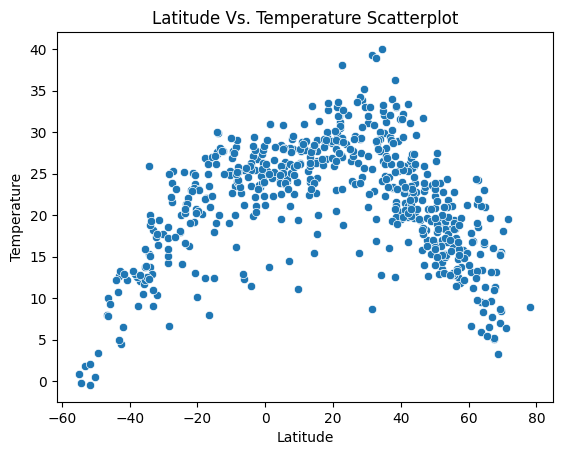

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
# Build scatter plot for latitude vs. temperature
fig=sns.scatterplot(data=city_data_df,x="Lat",y="Max Temp")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs. Temperature Scatterplot")
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

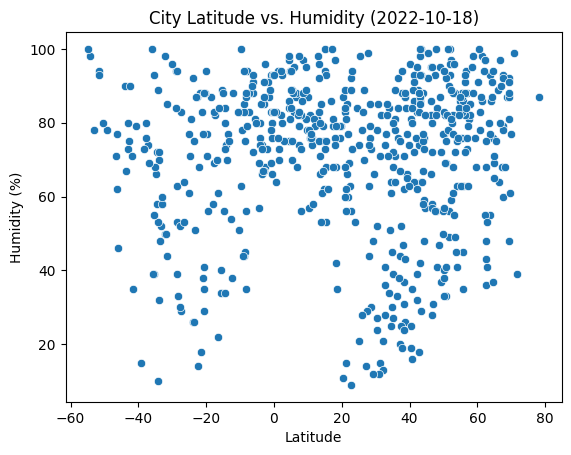

In [138]:
# Build the scatter plots for latitude vs. humidity
import seaborn as sns
import matplotlib.pyplot as plt
# Build scatter plot for latitude vs. temperature
sns.scatterplot(data=city_data_df,x="Lat",y="Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

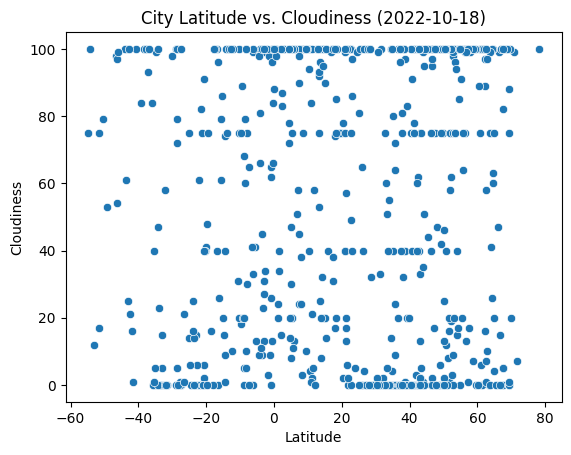

In [139]:
# Build the scatter plots for latitude vs. cloudiness
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=city_data_df,x="Lat",y="Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

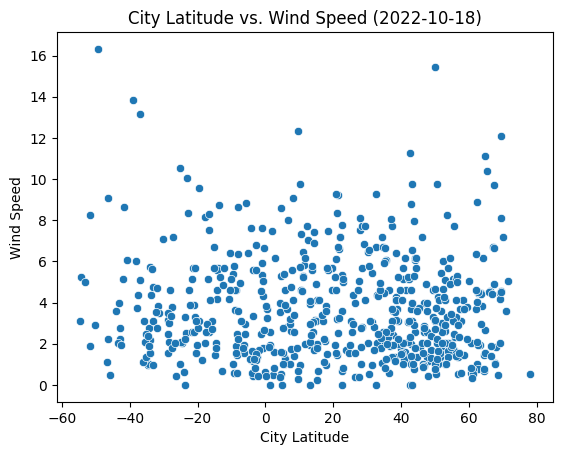

In [140]:
# Build the scatter plots for latitude vs. wind speed
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=city_data_df,x="Lat",y="Wind Speed")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

NameError: ignored

In [143]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,badr hunayn,23.7829,38.7905,28.55,53,5,1.70,SA,1691714790
5,tiksi,71.6872,128.8694,19.50,39,7,5.06,RU,1691714791
6,bodo,67.2800,14.4050,16.08,68,0,6.69,NO,1691714791
7,bethel,41.3712,-73.4140,21.47,86,100,1.24,US,1691714791
11,pereslavl'-zalesskiy,56.7393,38.8563,14.76,94,13,0.51,RU,1691714792


In [144]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,12.36,72,0,0.97,ZA,1691714790
1,sampit,-2.5333,112.9500,26.78,68,99,1.37,ID,1691714790
2,karratha,-20.7377,116.8463,23.80,41,2,3.29,AU,1691714790
3,blackmans bay,-43.0167,147.3167,12.61,73,100,2.77,AU,1691714790
8,grytviken,-54.2811,-36.5092,-0.23,98,100,5.23,GS,1691714791


###  Temperature vs. Latitude Linear Regression Plot

4      26.070238
5      42.484010
6      48.686784
7      38.911067
11     51.080837
         ...    
601    18.706711
602    38.294417
603    35.519492
604    37.024844
605    25.199673
Name: Max Temp, Length: 430, dtype: float64
y = -1.81x +77.85
The r-value is: 0.39962904085407136


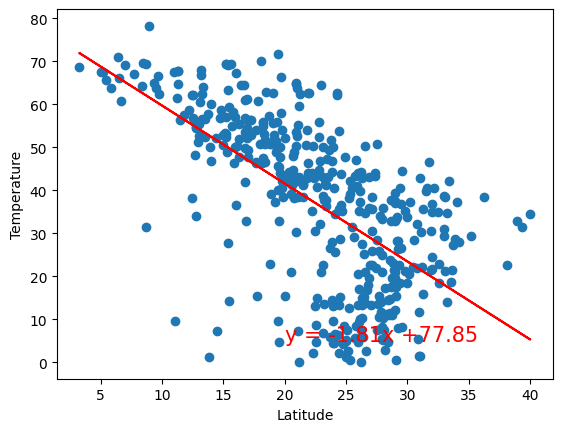

In [147]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])

# Get regression values
regress_values = northern_hemi_df['Max Temp'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'])
plt.plot(northern_hemi_df['Max Temp'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0     -32.032750
1      -9.084713
2     -13.827095
3     -31.634899
8     -52.068518
         ...    
588   -14.813766
590   -32.191890
591    -4.978893
592   -11.519561
599    -7.636536
Name: Max Temp, Length: 176, dtype: float64
y = 1.59x +-51.7
The r-value is: 0.6237383066553123


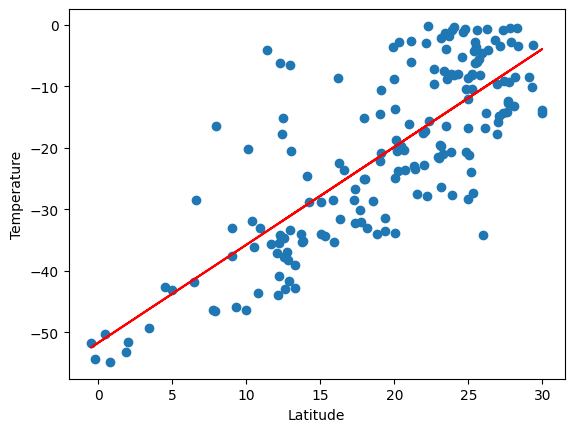

In [149]:
# Linear regression on Southern Hemisphere
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])

# Get regression values
regress_values = southern_hemi_df['Max Temp'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'])
plt.plot(southern_hemi_df['Max Temp'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere DataFrame demonstrates a negative relationship between Temperature and Latitude: as Latitude increases, Temperature decreases.There are not any values in Southern Hemisphere, because this is the Shortened List of cities as the entire list did not run when the DataFrame was created after attempting to access the entries.

### Humidity vs. Latitude Linear Regression Plot

4      37.451887
5      37.857942
6      37.016829
7      36.494760
11     36.262729
         ...    
601    36.871810
602    36.436752
603    36.900814
604    36.523763
605    36.842806
Name: Humidity, Length: 430, dtype: float64
y = -0.03x +38.99
The r-value is: 0.0010203393871338392


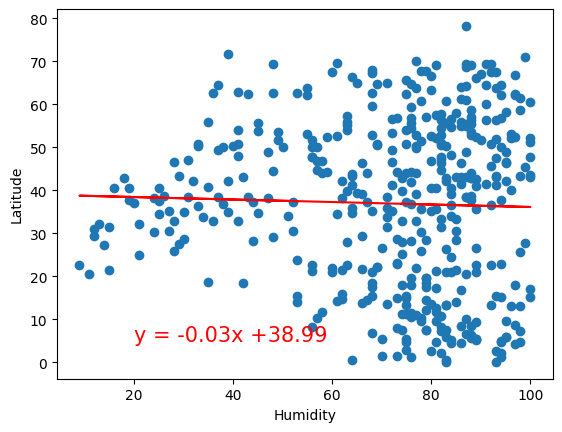

In [151]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])

# Get regression values
regress_values = northern_hemi_df['Humidity'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(northern_hemi_df['Humidity'],northern_hemi_df['Lat'])
plt.plot(northern_hemi_df['Humidity'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

0     -20.800003
1     -21.176723
2     -23.719582
3     -20.705823
8     -18.351324
         ...    
588   -22.589422
590   -19.198944
591   -21.270903
592   -24.284662
599   -22.495242
Name: Humidity, Length: 176, dtype: float64
y = 0.09x +-27.58
The r-value is: 0.018095726846367045


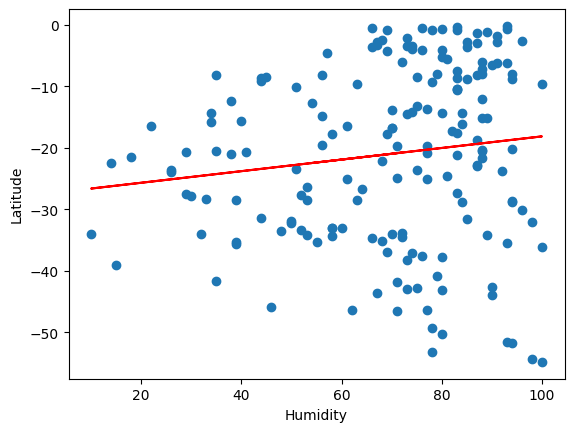

In [159]:
# Southern Hemisphere
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])

# Get regression values
regress_values = southern_hemi_df['Humidity'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Humidity'],southern_hemi_df['Lat'])
plt.plot(southern_hemi_df['Humidity'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Humidity and Latitude in the Northern Hemisphere have a low negative sloping relationship.

### Cloudiness vs. Latitude Linear Regression Plot

Unnamed: 0
0    38.246922
1    38.046564
2    37.984230
3    37.912991
4    37.912991
5    38.068826
6    37.801681
7    37.801681
8    38.246922
9    37.912991
Name: cloudiness, dtype: float64
y = -0.0x +38.25
The r-value is: 0.00011579794940464559


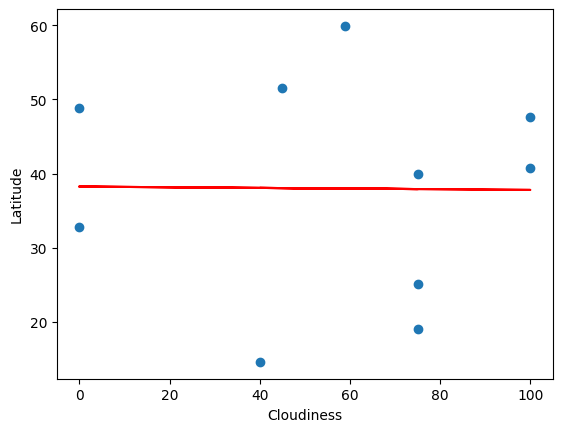

In [88]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['cloudiness'], northern_hemi_df['lat'])

# Get regression values
regress_values = northern_hemi_df['cloudiness'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(northern_hemi_df['cloudiness'],northern_hemi_df['lat'])
plt.plot(northern_hemi_df['cloudiness'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.02056735429994368


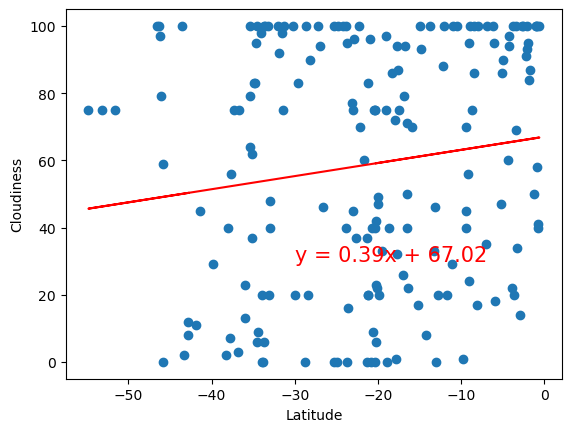

In [ ]:
# Southern Hemisphere
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['cloudiness'], southern_hemi_df['lat'])

# Get regression values
regress_values = southern_hemi_df['cloudiness'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['cloudiness'],southern_hemi_df['lat'])
plt.plot(southern_hemi_df['cloudiness'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

4      37.336782
5      36.574220
6      36.204286
7      37.441180
11     37.606856
         ...    
601    36.556064
602    35.164842
603    36.322302
604    37.604586
605    36.905571
Name: Wind Speed, Length: 430, dtype: float64
y = -0.23x +37.72
The r-value is: 0.0008243621558545727


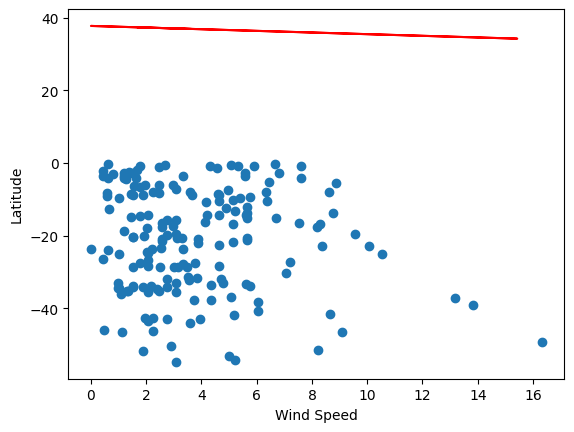

In [158]:
# Northern Hemisphere
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])

# Get regression values
regress_values = northern_hemi_df['Wind Speed'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'])
plt.plot(northern_hemi_df['Wind Speed'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0     -19.458514
1     -19.680767
2     -20.747580
3     -20.458652
8     -21.825506
         ...    
588   -19.152917
590   -19.975252
591   -19.625204
592   -19.236262
599   -19.286269
Name: Wind Speed, Length: 176, dtype: float64
y = -0.56x +-18.92
The r-value is: 0.010854978155548076


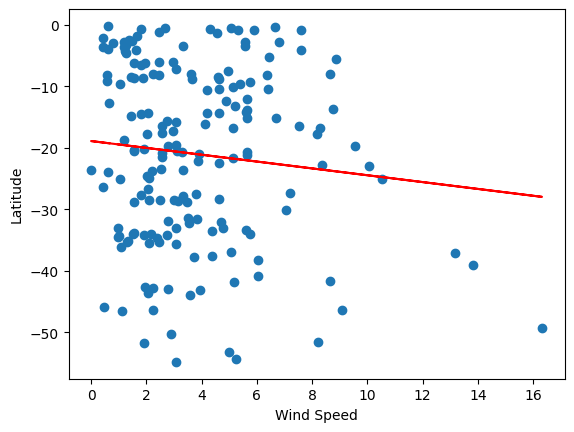

In [156]:
# Southern Hemisphere
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])

# Get regression values
regress_values = southern_hemi_df['Wind Speed'] * slope + intercept
print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'])
plt.plot(southern_hemi_df['Wind Speed'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, the relationship is highly negative between wind speed and latitude: as wind speed increases, the latitude decreases.